<a href="https://colab.research.google.com/github/gilsu200/DL_study/blob/main/Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A first look at a neural network



**케라스에서 MNIST 데이터셋 적재하기**

In [22]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

**신경망 구조**

In [23]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**컴파일 단계**

In [24]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**이미지 데이터 준비하기(정규화,실수)**

In [4]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

**모델 훈련**

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

**모델을 사용해 예측 만들기**

In [ ]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

**새로운 데이터에서 모델 평가하기**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"테스트 정확도: {test_acc}")

# Data representations for neural networks

### 핵심 속성(차원,샘플,타입)

In [ ]:
train_images.ndim
train_images.shape
train_images.dtype

### 랭크-3 텐서

In [ ]:
x=np.array([[[1,2,3],
             [4,5,6],
             [7,8,9]],
            [[3,2,1],
             [6,5,4],
             [9,8,7]],
            [[1,2,3],
             [4,5,6],
             [7,8,9]]])
x.ndim


### - mnist 테스트 데이터 세트에서 1번째 숫자 시각화 시도(1번째 숫자 데이터 = test_images[0])

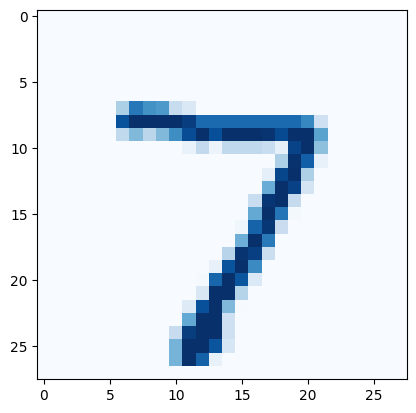

In [9]:
import matplotlib.pyplot as plt
digit=test_images[0]
plt.imshow(digit,cmap=plt.cm.Blues)
plt.show()

### 1번째 숫자를 조작하고 시각화해 보세요.

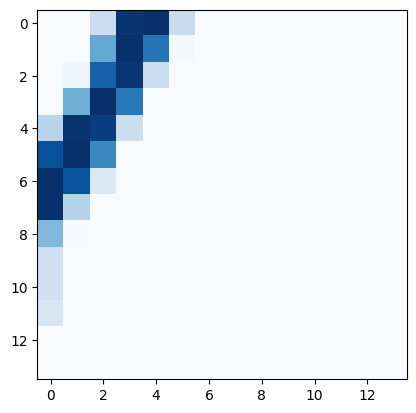

In [10]:
mani_data=test_images[0,14:,14:]
import matplotlib.pyplot as plt
digit=mani_data
plt.imshow(digit,cmap=plt.cm.Blues)
plt.show()

# The gear of neural networks: tensor operations

### Try to use naïve version of relu and add functions.

In [ ]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [ ]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

### Try to use broadcasting with your own example.

In [ ]:
import numpy as np
A = np.array([[1, 2, 3],
              [4, 5, 6]])
B = np.array([10, 20, 30])
result = A + B
result

### Try reshaping code

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))

In [ ]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x = x.reshape((6, 1))
print(x)

In [15]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

# The engine of neural networks: gradient-based optimization


### Say x, y are scalar, find derivatives of  f(x,y)=(x^2)*y+x*y+3*y with respect to x and y. (Set x = 2, y = 1 for the calculation)

In [ ]:
import tensorflow as tf

x = tf.Variable(2.)
y = tf.Variable(1.)

with tf.GradientTape(persistent=True) as tape:
     z = x**2 * y + x * y + 3 * y

grad_of_z_wrt_x = tape.gradient(z, x)
grad_of_z_wrt_y = tape.gradient(z, y)
print(grad_of_z_wrt_x)
print(grad_of_z_wrt_y)



### Find derivatives of f(W,b)=(x*W+b) with respect to W and b

In [ ]:
import tensorflow as tf
import numpy as np

x = tf.constant(np.array([1., 4., 3.]).reshape(1, 3), dtype=tf.float32)
W = tf.Variable(tf.random.uniform((3, 2)), dtype=tf.float32)
b = tf.Variable(tf.zeros((2,)), dtype=tf.float32)

with tf.GradientTape(persistent=True) as tape:
    y = tf.matmul(x, W) + b

grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])
print(grad_of_y_wrt_W_and_b)

### Find derivatives of f(W,b)=(x*W+b)^3 with respect to W and b

In [ ]:
import tensorflow as tf
import numpy as np

x = tf.constant(np.array([1., 4., 3.]).reshape(1, 3), dtype=tf.float32)
W = tf.Variable(tf.random.uniform((3, 2)), dtype=tf.float32)
b = tf.Variable(tf.zeros((2,)), dtype=tf.float32)

with tf.GradientTape(persistent=True) as tape:
    y = tf.pow(tf.matmul(x, W) + b, 3)

grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])
print(grad_of_y_wrt_W_and_b)


# Looking back at our first example

### Check weights from defined models.

### Try running Naïve version of model and check weights.
